<h1> Clustering with K-means </h1>
<p> Clustering is an altogether different problem than classification or regression. With clustering, we are given a bunch of datapoints, but no labels. So we want to figure out what these datapoints have in common, so we can "learn" the features from the data. To do this, we "cluster" like data points iteratively. Once this process is done, we can then examine the data clusters to establish what the common features of the dataset are. To do this clustering process, we use an algorithm called k-means. </p>
<p> The basic K-means algorithm takes the following form:</p>
<ul>
    <li>Randomly pick K points to be the centroids (center of the clusters)</li>
    <li>Assign each data point to the closest cluster</li>
    <li>For each centroid, find its new position by averaging the position of each point in its cluster. Move it to the new point</li>
    <li>Reassign the data points to the closest centroid again</li>
    <li>Repeat steps 3 and 4 until no point changes ownership over an iteration.</li>
</ul>
<p> Now for comprehension's sake I will implement a simple 2-d K-means clustering algorithm. This isn't part of the course but I thought it would be a nice little excersize. </p>

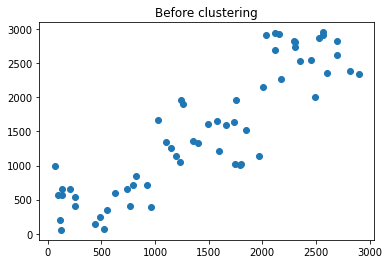

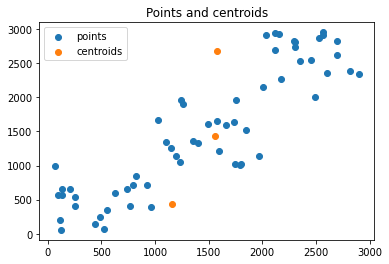

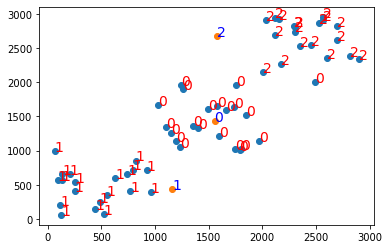

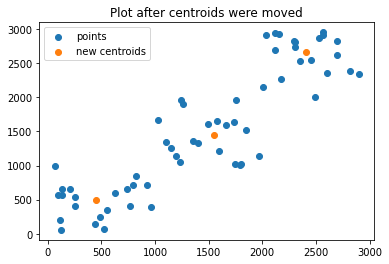

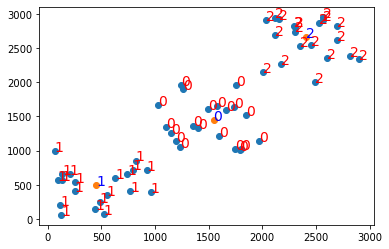

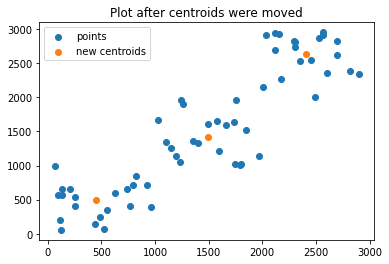

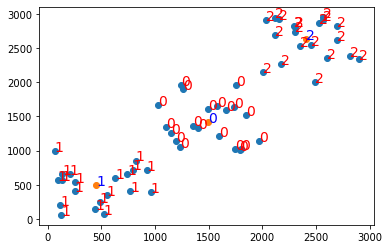

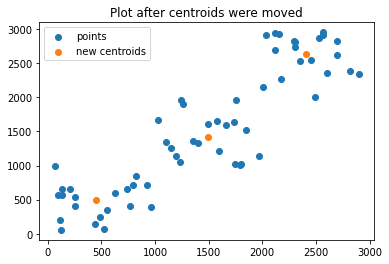

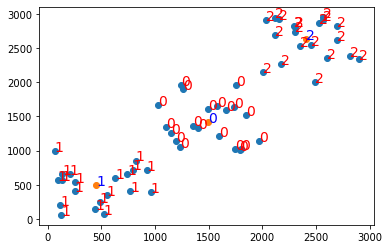

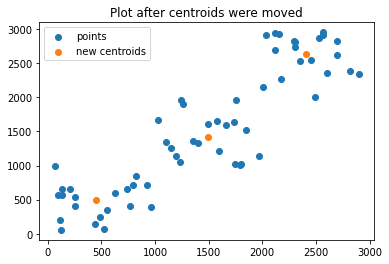

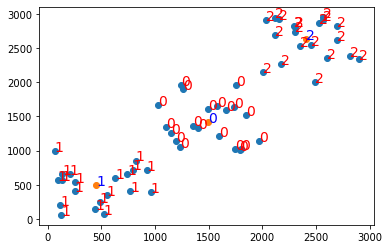

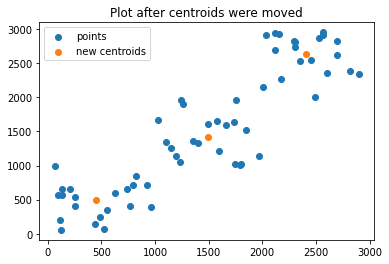

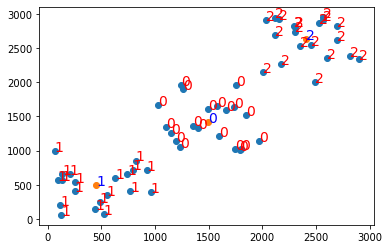

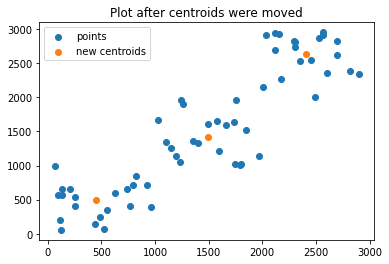

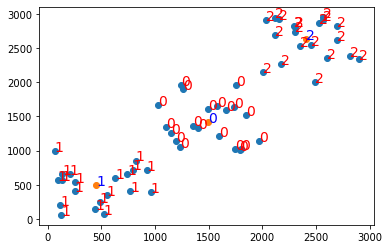

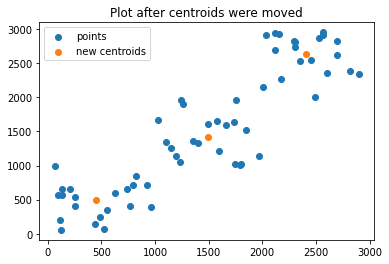

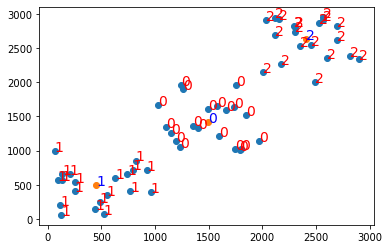

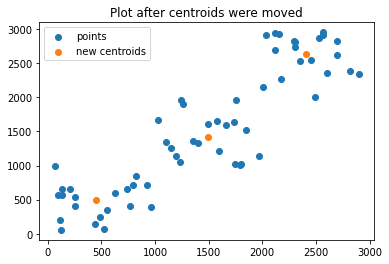

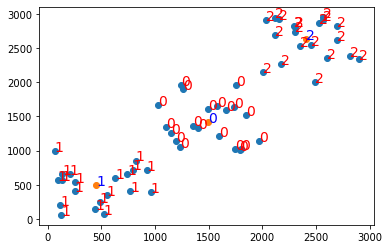

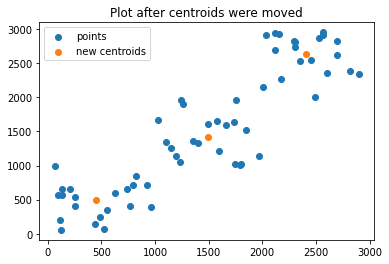

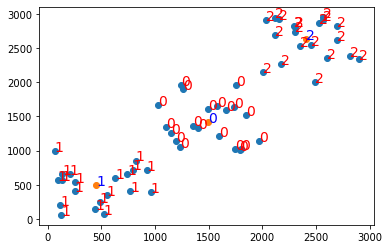

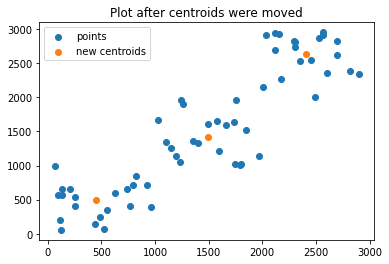

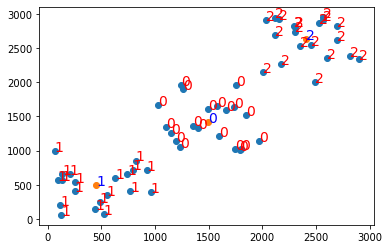

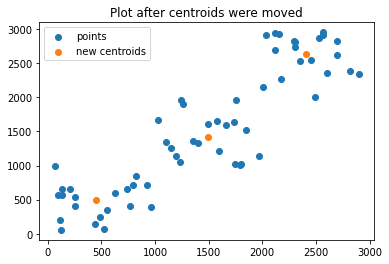

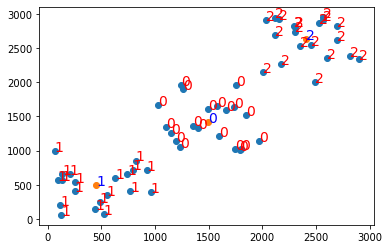

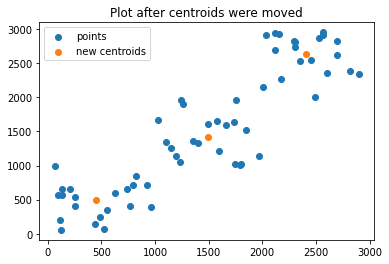

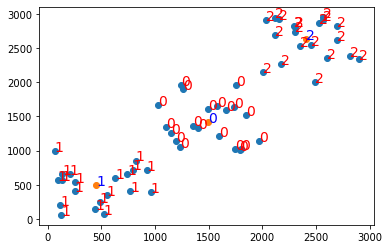

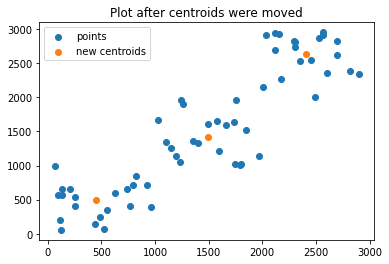

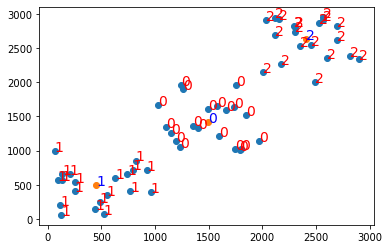

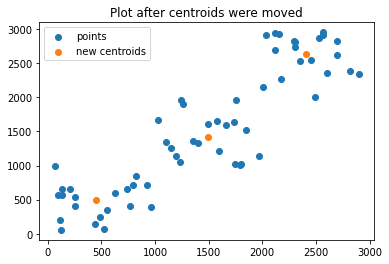

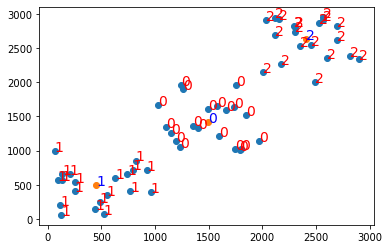

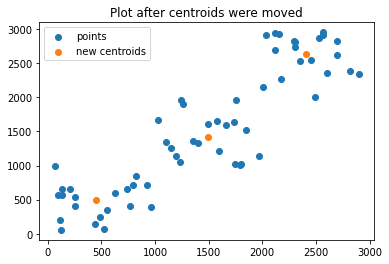

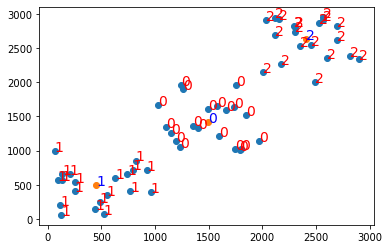

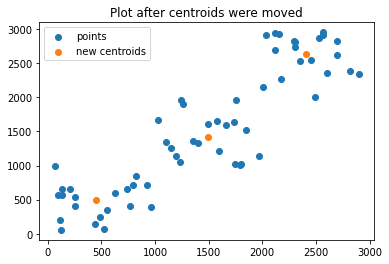

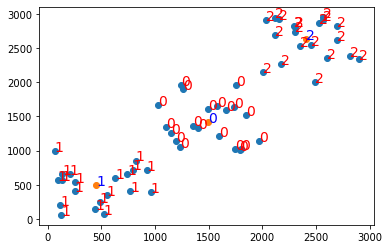

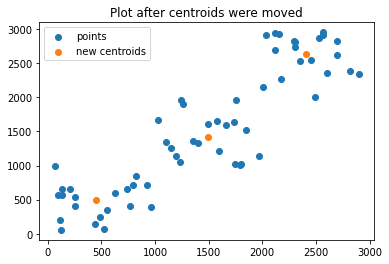

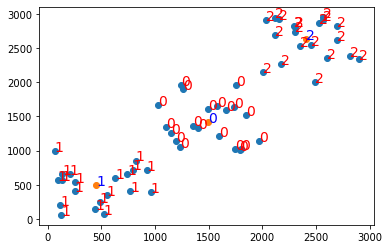

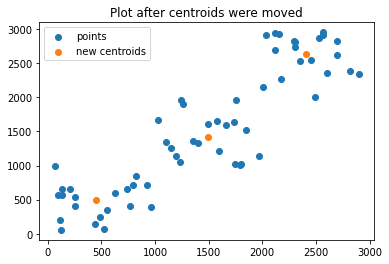

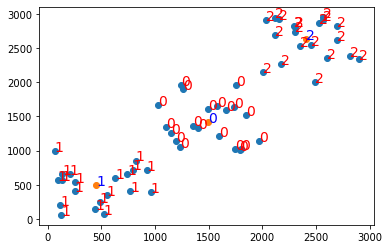

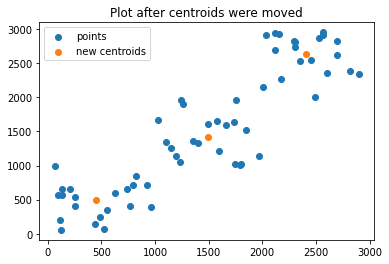

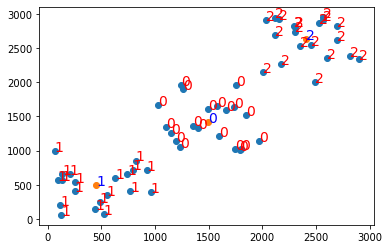

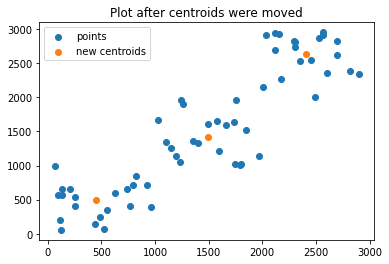

In [2]:
import numpy as np
from numpy import array as arr
from matplotlib import pyplot as plt
import random

class kmeans:
    
    def __init__(self,points_x,points_y,points,K):
        self.points=points
        self.dims = np.shape(self.points[0])
        self.K=K
        self.points_x=points_x
        self.points_y=points_y
        self.centroids=[]
        self.centroids_old=[]
        #make a dictionary for clustering
        self.points_clustered={}
    
    def make_centroids(self):
        #first assigning centroids
        for i in range(self.K):
            cent_x=random.randrange(0,int(np.max(self.points_x)))
            cent_y=random.randrange(0,int(np.max(self.points_y)))
            self.centroids.append([cent_x,cent_y])
        plt.scatter(self.points_x,self.points_y,label="points")
        #grab centroid co-ordinates for plotting
        self.cent_x=[vec[0] for vec in self.centroids]
        self.cent_y=[vec[1] for vec in self.centroids]
        plt.scatter(self.cent_x,self.cent_y,label="centroids")
        plt.legend()
        plt.title("Points and centroids")
        plt.show()
    
    def assign_points(self):
        self.centroids_old = self.centroids
        for point in self.points:
            #pick random centroid to say we are close to initially
            closest_centroid=random.randrange(0,self.K)
            #initialize distance
            min_distance=np.linalg.norm(arr(self.centroids[closest_centroid])-arr(point))
            for index,centroid in enumerate(self.centroids):
                cur_distance=np.linalg.norm(arr(point)-arr(centroid))
                if cur_distance < min_distance:
                    min_distance=cur_distance
                    closest_centroid=index
            #assign label to point
            self.points_clustered[str(point)]=closest_centroid
        #now plot to show 
        plt.scatter(self.points_x,self.points_y,label="points")
        plt.scatter(self.cent_x,self.cent_y,label="centroids")
        for index,centroid in enumerate(self.centroids):
            plt.text(centroid[0],centroid[1],str(index),color="blue",fontsize=14)
        for point in self.points:
            plt.text(point[0], point[1], str(self.points_clustered[str(point)]), color="red", fontsize=14)
        plt.show()
        
    def move_centroid(self):
        #move centroid to the average of the points that belong to it
        #very naive implementation, could speed this up
        for index,centroid in enumerate(self.centroids):
            average_x=[]
            average_y=[]
            for point in self.points:
                #point belongs to centroid
                if self.points_clustered[str(point)]==index:
                    average_x.append(point[0])
                    average_y.append(point[1])
            new_x=np.mean(average_x)
            new_y=np.mean(average_y)
            self.centroids[index]=[new_x,new_y]
        #calculate new centroid x's and y's
        self.cent_x = [vec[0] for vec in self.centroids]
        self.cent_y = [vec[1] for vec in self.centroids]
        #now plot to show what we did
        plt.scatter(self.points_x,self.points_y,label="points")
        plt.scatter(self.cent_x,self.cent_y,label="new centroids")
        #for index,centroid in enumerate(self.centroids):
        #    plt.text(centroid[0],centroid[1],str(index),color="blue",fontsize=14)
        #for point in self.points:
        #    plt.text(point[0], point[1], str(self.points_clustered[str(point)]), color="red", fontsize=14)
        plt.legend()
        plt.title("Plot after centroids were moved")
        plt.show()
        
    def run_model(self,iters):
        self.make_centroids()
        for i in range(iters):
            cluster_guy.assign_points()
            cluster_guy.move_centroid()       
        
if __name__=="__main__":
    #making points and such
    K = 3
    points_x=[]
    points_y=[]
    points = []
    #make 3 distinct clusters
    for i in range(20):
        x=random.randrange(0,1000)
        y=random.randrange(0,1000)
        points_x.append(x)
        points_y.append(y)
        points.append([x,y])
    for i in range(20):
        x=random.randrange(1000,2000)
        y=random.randrange(1000,2000)
        points_x.append(x)
        points_y.append(y)
        points.append([x,y])
    for i in range(20):
        x=random.randrange(2000,3000)
        y=random.randrange(2000,3000)
        points_x.append(x)
        points_y.append(y)
        points.append([x,y])
    plt.scatter(points_x,points_y)
    plt.title("Before clustering")
    plt.show()
    #now clustering
    cluster_guy=kmeans(points_x,points_y,points,K)
    #20 iterations should be enough
    cluster_guy.run_model(20)